# Cálculo sistema simétrico de Frecuencias

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pylab
from tqdm import tqdm
from numpy.linalg import norm


pi=math.pi
mpl.rcParams.update(mpl.rcParamsDefault)
colores=['red', 'blue', 'darkviolet', 'gray', 'hotpink']

In [2]:
#Instrucciones necesarias para importar los módulos que yo escribí.

# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# Insert the directory
import sys
sys.path.insert(0, '/content/drive/My Drive/tesis-amelie-ipynb/13Marzo') 


#Gracias a https://medium.com/analytics-vidhya/importing-your-own-python-module-or-python-file-into-colab-3e365f0a35ec :)

Mounted at /content/drive


In [3]:
import funciones_analisisFrec
import base_fourier_V1

In [4]:
%cat /content/drive/My Drive/tesis-amelie-ipynb/13Marzo/base_fourier_V1

cat: /content/drive/My: No such file or directory
cat: Drive/tesis-amelie-ipynb/13Marzo/base_fourier_V1: No such file or directory


In [5]:
#Funciones coseno y coseno a partir de las que se construye todo lo que sigue.

def c_w(n,t, w):
  return math.sqrt(1/n)*np.cos(2*pi*w*t)

def s_w(n,t, w):
  return math.sqrt(1/n)*np.sin(2*pi*w*t)

In [6]:
# Definición de vectores 

def vector_g_w_n(n, w):
	"""
	'n' es la dimensión (int mayor a uno), 'w' es una frecuencia (float positivo).
	"""
	if w==0:
		return 1/math.sqrt(n)*np.ones(n)
	
	#Creamos la malla uniforme respecto a la cual el coseno y el seno son simétricos
	#o antisimétricos.

	malla_uniforme=[ -1/2+t/(n-1) for t in range (n)]
	#escXarr
	G_w_n=np.array([c_w(n,t,w) for t in malla_uniforme])
	norma=norm(G_w_n)
	return funciones_analisisFrec.escXarr(1/norma, G_w_n)

def vector_h_w_n(n, w):
	"""
	'n' es la dimensión (int mayor a uno), 'w' es una frecuencia (float positivo).
	"""
	if w==0:
		return 0*np.ones(n)
	#Creamos la malla uniforme
	malla_uniforme=[ -1/2+t/(n-1) for t in range (n)]

	H_w_n=np.array([1/math.sqrt(n)*math.sin(2*pi*w*t) for t in malla_uniforme])
	norma=norm(H_w_n)
	return funciones_analisisFrec.escXarr(1/norma, H_w_n)

In [7]:
def calculo_base(n):
  M=math.ceil(n/2)

  base_F=[vector_g_w_n(n, 0)] #inicializando la base, que será un array. Ya incluimos la primera entrada
 
  for w in range(1,M):
    base_F.append(vector_g_w_n(n, w))
    base_F.append(vector_h_w_n(n, w))
  if n%2==1: #si N es impar, ya terminamos
    return base_F
  else: #en caso contrario, falta agregar un último vector a la base.
    base_F.append(vector_g_w_n(n, M))
    return base_F

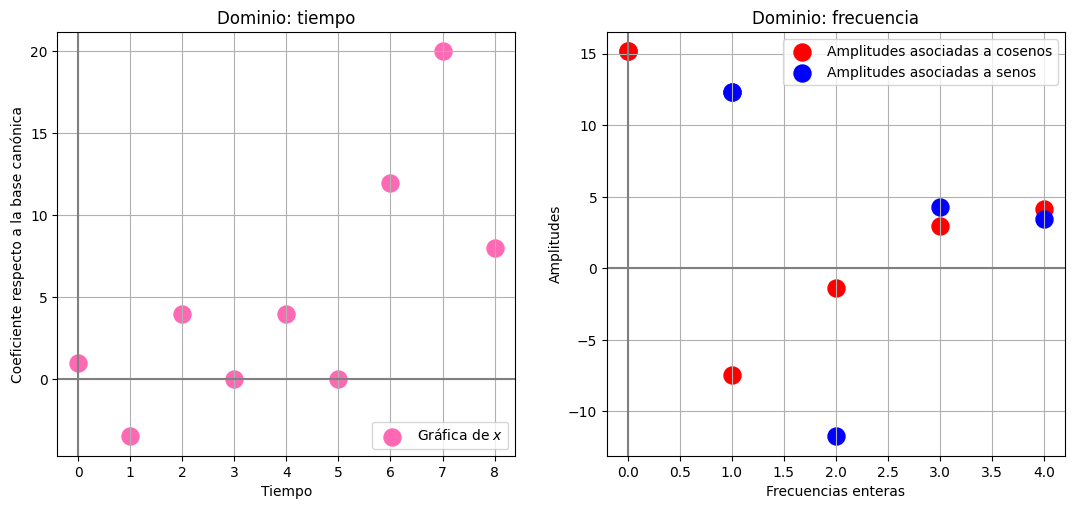

In [8]:
x=[1,-3.5,4,0,4,0,12,20,8]
funciones_analisisFrec.grafica_dominio_frecuencia(x, base_fourier_V1)

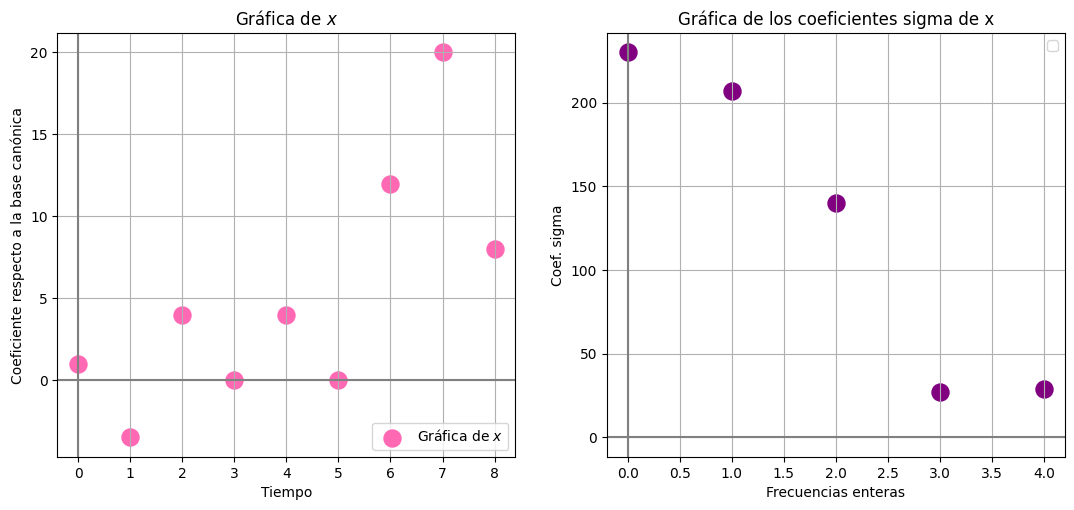

In [10]:
funciones_analisisFrec.grafica_sigmas(x, base_fourier_V1)